In [3]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

# 1. 构造人造数据集 y = wX + b 的 X 和 y
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X,  w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print("features:", features[0], "\n labels:", labels[0])


features: tensor([1.6098, 1.9750]) 
 labels: tensor([0.6988])


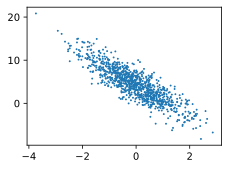

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1)

In [5]:
# 2.随机样本读取
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i : min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, "\n", y)
    break


tensor([[-1.5591e-01,  1.5138e+00],
        [-8.2345e-01,  9.2173e-01],
        [ 1.1255e+00, -1.1773e-01],
        [-5.6038e-02, -4.5689e-01],
        [-9.1028e-01,  1.5554e-01],
        [-6.6085e-02, -9.0871e-01],
        [-5.9986e-01, -7.8712e-01],
        [-7.9861e-02, -3.7747e-01],
        [-1.5421e+00,  2.4193e-01],
        [ 9.2569e-01,  1.3796e-04]]) 
 tensor([[-1.2551],
        [-0.5641],
        [ 6.8521],
        [ 5.6427],
        [ 1.8447],
        [ 7.1512],
        [ 5.6795],
        [ 5.3404],
        [ 0.3009],
        [ 6.0493]])


In [6]:
w = torch.normal(0, 0.01, size = (2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# 3. 定义线性回归模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [8]:
# 4. 定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# 5. 定义优化算法（小批量随机梯度下降）
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [17]:
# 6. 训练
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_1 = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_1.mean()):f}')

epoch 1, loss 0.000052
epoch 2, loss 0.000052
epoch 3, loss 0.000051


In [18]:
print(true_w - w.reshape(true_w.shape))
print(true_b - b)

tensor([-1.0729e-05,  3.5667e-04], grad_fn=<SubBackward0>)
tensor([0.0003], grad_fn=<RsubBackward1>)
